In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy import sparse
import mglearn
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
from scipy.stats import mode
#!pip install mlxtend
from mlxtend.plotting import scatterplotmatrix
plt.rcParams['image.cmap'] = "gray"
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
cabbage_outlier = pd.read_csv('cabbage_merge.csv',encoding='euc=kr',index_col=0)
cabbage_outlier = cabbage_outlier.drop(['품목','품종','광역산지','연도','월','일'],axis=1)

In [3]:
cabbage_outlier

,일시,일별 도매가격(원/kg) 평균,일별 거래금액(백만원) 평균,일별 거래량(톤) 합,2달 평균기온(°C),2달 평균최저기온(°C),2달 평균최고기온(°C),일강수량(mm),2달 평균 풍속(m/s),2달 평균 상대습도(%),2달 평균 합계일조시간(hr)
0,2014-07-08,500.000000,0.190000,0.38,21.181967,17.434426,25.086885,1.477049,1.960656,64.878689,5.842623
1,2014-07-09,581.000000,0.190000,0.32,21.381967,17.663934,25.318033,1.927869,1.952459,65.352459,5.714754
2,2014-07-10,624.000000,0.320000,0.51,21.537705,17.901639,25.411475,1.927869,1.949180,65.834426,5.606557
3,2014-07-24,828.666667,5.113333,19.30,23.577049,20.121311,27.290164,2.309836,1.988525,65.408197,5.724590
4,2014-07-25,736.000000,6.990000,9.50,23.575410,20.149180,27.336066,2.480328,1.972131,66.034426,5.709836
...,...,...,...,...,...,...,...,...,...,...,...
660,2020-11-16,443.000000,0.640000,1.44,15.267213,11.104918,20.050820,0.727869,2.321311,58.267213,6.542623
661,2020-11-18,630.000000,0.450000,0.72,15.119672,10.877049,19.959016,0.727869,2.296721,58.755738,6.503279
662,2020-11-19,550.000000,0.310000,0.57,15.104918,10.813115,19.937705,0.854098,2.336066,58.781967,6.362295
663,2020-11-20,510.000000,0.550000,1.08,14.926230,10.640984,19.749180,0.854098,2.381967,58.762295,6.349180


In [4]:
#시계열 데이터 분석 Prophet
a=cabbage_outlier[['일시','일별 도매가격(원/kg) 평균']]

In [5]:
from fbprophet import Prophet
a=a.rename(columns={'일시':'ds','일별 도매가격(원/kg) 평균':'y'})
prophet = Prophet(changepoint_range=0.8,changepoint_prior_scale=0.07, yearly_seasonality=20,weekly_seasonality=10)
prophet.add_country_holidays(country_name='KR')
prophet.add_seasonality(name='monthly',period=30.5,fourier_order=20)
prophet.fit(a)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = prophet.make_future_dataframe(periods=365) #period 예측기간
print(future.shape)
future

(1030, 1)


,ds
0,2014-07-08
1,2014-07-09
2,2014-07-10
3,2014-07-24
4,2014-07-25
...,...
1025,2021-11-20
1026,2021-11-21
1027,2021-11-22
1028,2021-11-23


In [10]:
forecast = prophet.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[665:]

,ds,yhat,yhat_lower,yhat_upper
665,2020-11-25,921.495260,567.063813,1248.633551
666,2020-11-26,871.424789,548.556824,1214.762470
667,2020-11-27,891.377527,545.311136,1222.547109
668,2020-11-28,819.805548,503.818791,1170.736817
669,2020-11-29,1115.729834,781.480082,1466.584799
...,...,...,...,...
1025,2021-11-20,1217.790002,886.303627,1570.314637
1026,2021-11-21,1350.176548,1039.658208,1676.838419
1027,2021-11-22,1246.735526,910.176864,1555.590502
1028,2021-11-23,1190.390334,855.544740,1536.953756


In [11]:
forecast = prophet.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[940:947].mean()

<ipython-input-11-7f0a5369116a>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[940:947].mean()


yhat          1620.927762
yhat_lower    1278.870297
yhat_upper    1962.160939
dtype: float64

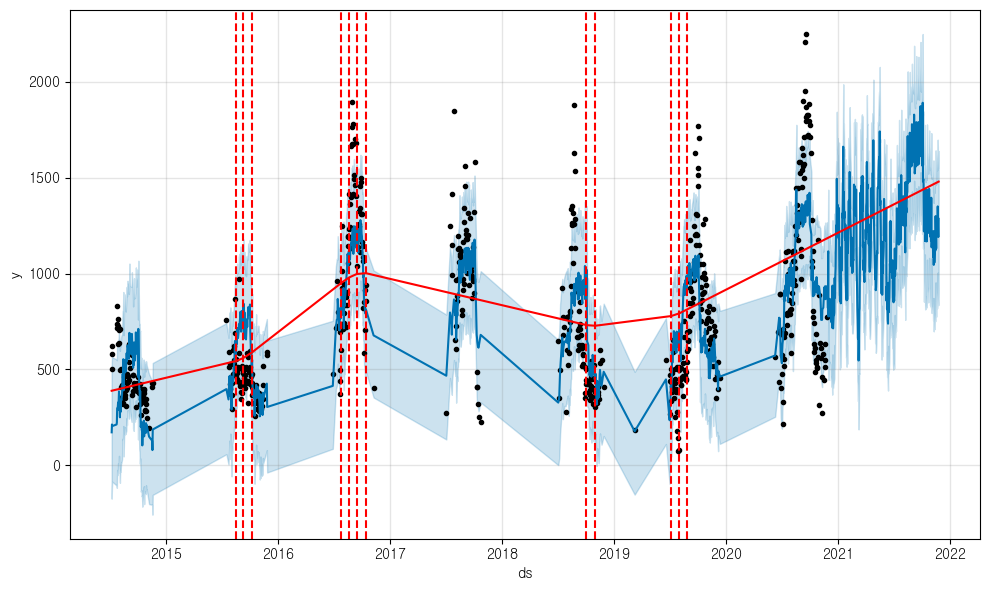

In [12]:
# 점선 = 트렌드 변화 지점
from fbprophet.plot import add_changepoints_to_plot
fig1 =prophet.plot(forecast)
a=add_changepoints_to_plot(fig1.gca(), prophet, forecast)
plt.show()

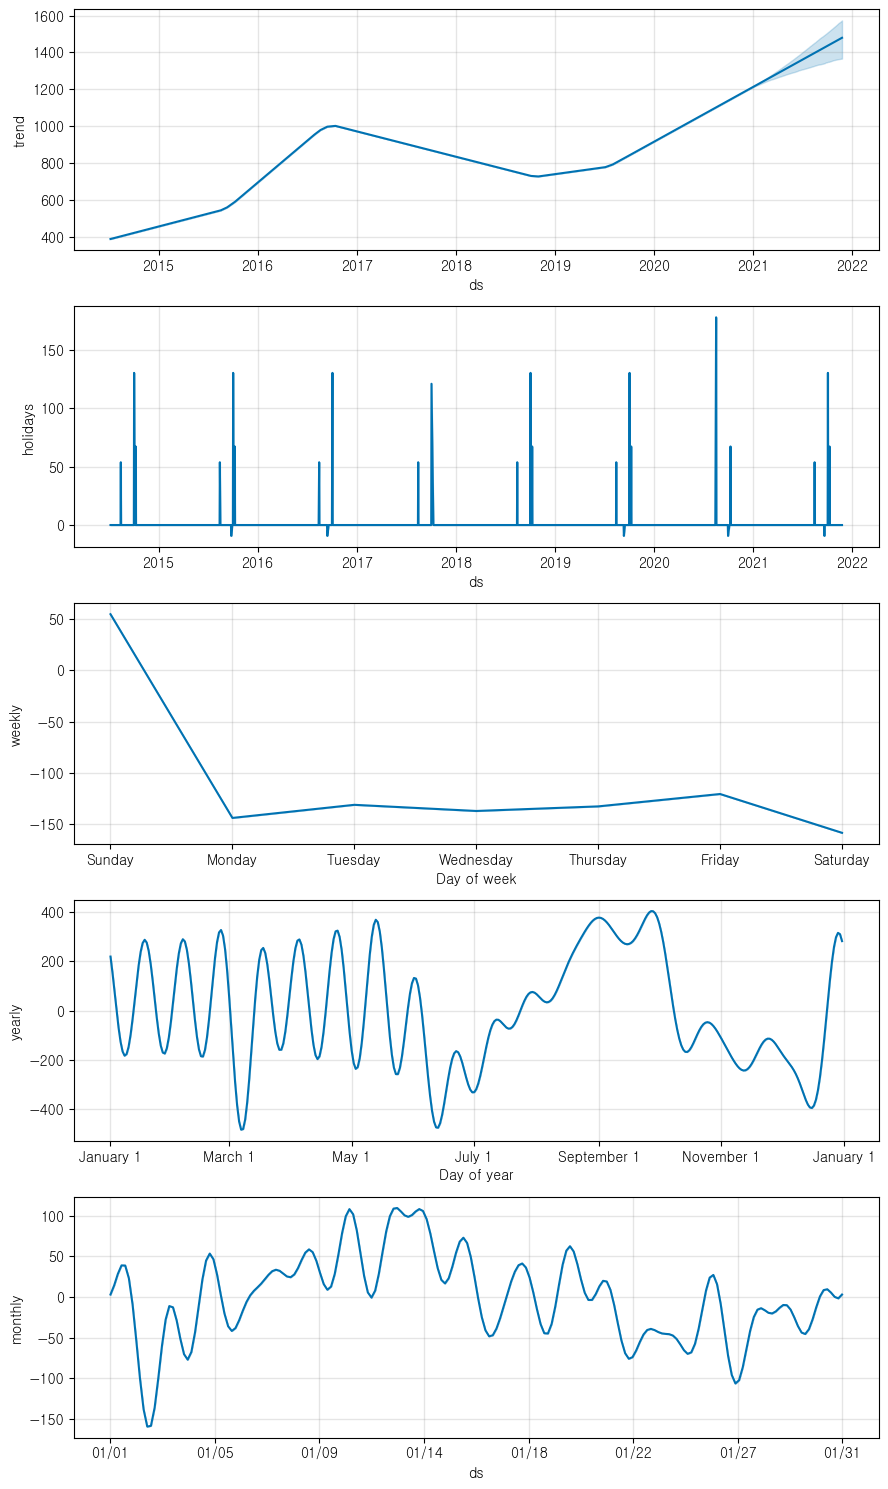

In [9]:
fig2 = prophet.plot_components(forecast) #EDA 할때 사용
plt.show()